In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing import image
import cv2 as cv

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

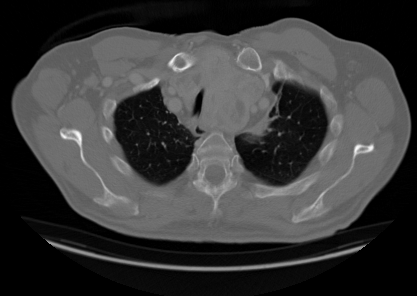

In [ ]:
some_img = cv2.imread('/content/drive/MyDrive/input/chest-ctscan-images/Data/test/large.cell.carcinoma/000111 (2).png', 0)
cv2_imshow(some_img)


In [ ]:
train_set='/content/drive/MyDrive/input/chest-ctscan-images/Data/train'
val_set='/content/drive/MyDrive/input/chest-ctscan-images/Data/valid'
test_set='/content/drive/MyDrive/input/chest-ctscan-images/Data/test'

In [ ]:
!ls

drive  sample_data


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
assert os.path.exists('/content')

In [ ]:
train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)
val_datagen= image.ImageDataGenerator(    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1)
test_datagen= image.ImageDataGenerator(    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_set,
    target_size = (224,224),
    batch_size = 8,
    class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory(
    val_set,
    target_size = (224,224),
    batch_size = 8,
    shuffle=True,
    class_mode = 'categorical')
validation_generator = test_datagen.flow_from_directory(
    test_set,
    target_size = (224,224),
    batch_size = 8,
    shuffle=True,
    class_mode = 'categorical')

Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


In [ ]:
base_model = tf.keras.applications.EfficientNetB2(weights='imagenet', input_shape=(224,224,3), include_top=False)

for layer in base_model.layers:
    layer.trainable=False
model = Sequential()
model.add(base_model)
model.add(GaussianNoise(0.25))
model.add(GlobalAveragePooling2D())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(GaussianNoise(0.25))
model.add(Dropout(0.25))
model.add(Dense(4, activation='softmax'))
model.summary()

31790344/31790344 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 7, 7, 1408)       7768569   
                                                                 
 gaussian_noise (GaussianNoi  (None, 7, 7, 1408)       0         
 se)                                                             
                                                                 
 global_average_pooling2d (G  (None, 1408)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               360704    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                           

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy','AUC','Precision','Recall'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
es=EarlyStopping(patience=3,monitor='val_loss')
filepath='best_model.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
history = model.fit(train_generator,
    epochs=18,
    validation_data=validation_generator,
    steps_per_epoch= 75,
    callbacks=checkpoint
    )

Epoch 1/18
75/75 [==============================] - ETA: 0s - loss: 1.3647 - accuracy: 0.5209 - auc: 0.7725 - precision: 0.5525 - recall: 0.4757
Epoch 1: val_accuracy improved from -inf to 0.57143, saving model to best_model.h5
75/75 [==============================] - 637s 8s/step - loss: 1.3647 - accuracy: 0.5209 - auc: 0.7725 - precision: 0.5525 - recall: 0.4757 - val_loss: 1.0168 - val_accuracy: 0.5714 - val_auc: 0.8169 - val_precision: 0.6393 - val_recall: 0.4444
Epoch 2/18
75/75 [==============================] - ETA: 0s - loss: 0.8807 - accuracy: 0.6549 - auc: 0.8775 - precision: 0.6944 - recall: 0.6013
Epoch 2: val_accuracy improved from 0.57143 to 0.60000, saving model to best_model.h5
75/75 [==============================] - 23s 312ms/step - loss: 0.8807 - accuracy: 0.6549 - auc: 0.8775 - precision: 0.6944 - recall: 0.6013 - val_loss: 0.9577 - val_accuracy: 0.6000 - val_auc: 0.8397 - val_precision: 0.6824 - val_recall: 0.5048
Epoch 3/18
75/75 [==============================] -

In [ ]:
model.evaluate(train_generator)

77/77 [==============================] - 11s 144ms/step - loss: 0.2391 - accuracy: 0.9021 - auc: 0.9908 - precision: 0.9186 - recall: 0.8842


[0.23908306658267975,
 0.9021207094192505,
 0.9907957315444946,
 0.9186440706253052,
 0.8841761946678162]

In [ ]:
model.evaluate(validation_generator)

40/40 [==============================] - 6s 136ms/step - loss: 0.7045 - accuracy: 0.7175 - auc: 0.9176 - precision: 0.7681 - recall: 0.6730


[0.7044931650161743,
 0.7174603343009949,
 0.9175527691841125,
 0.7681159377098083,
 0.6730158925056458]

In [ ]:
model.evaluate(test_generator)


9/9 [==============================] - 44s 5s/step - loss: 0.5765 - accuracy: 0.7083 - auc: 0.9396 - precision: 0.7353 - recall: 0.6944


[0.5764895677566528,
 0.7083333134651184,
 0.9396219253540039,
 0.7352941036224365,
 0.6944444179534912]

In [ ]:
accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

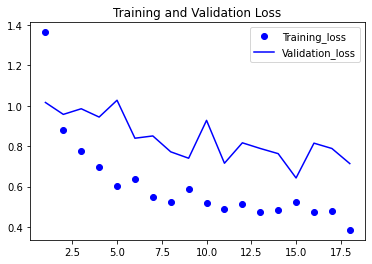

In [ ]:
# import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc) +1)

# plt.plot(epochs , acc ,'bo' ,label='Training_accuracy')
# plt.plot(epochs , acc ,'b' ,label='Validation_accuracy')
# plt.title('Training and Validation Accuracy')
# plt.legend()

# plt.figure()

plt.plot(epochs ,loss ,'bo' ,label='Training_loss')
plt.plot(epochs , val_loss ,'b',label='Validation_loss')
plt.title('Training and Validation Loss')
plt.legend()

# plt.figure()

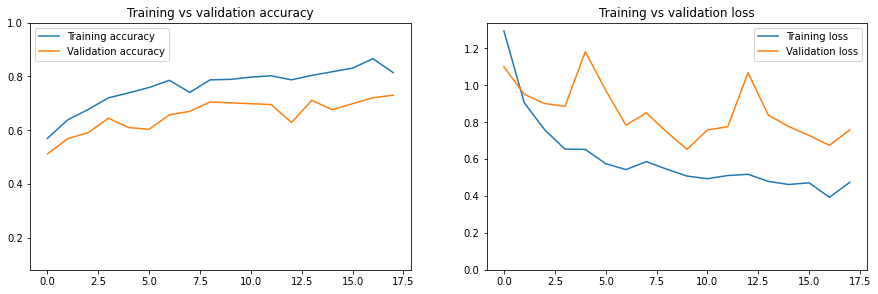

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.ylim(0.08, 1)
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.ylim(0, )
plt.legend()
plt.title("Training vs validation loss")

plt.show()

1/1 [==============================] - 3s 3s/step
[[0.04175191 0.22035788 0.00201094 0.73587924]]
THE UPLOADED IMAGE IS SUSPECTED AS: squamous cell carcinoma


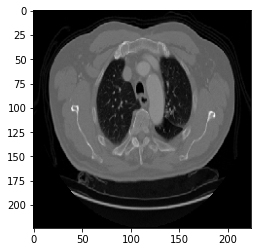

In [ ]:
from keras.preprocessing import image
img = tf.keras.utils.load_img('/content/drive/MyDrive/input/chest-ctscan-images/Data/test/squamous.cell.carcinoma/000108 (6).png',target_size=(224,224))
imag = tf.keras.utils.img_to_array(img)
imaga = np.expand_dims(imag,axis=0) 
ypred = model.predict(imaga)
print(ypred)
a=np.argmax(ypred,-1)
if a==0:
      op="Adenocarcinoma"
elif a==1:
      op="large cell carcinoma"
elif a==2:
      op="normal (void of cancer)"
else:
      op="squamous cell carcinoma"    
plt.imshow(img)
print("THE UPLOADED IMAGE IS SUSPECTED AS: "+str(op))